# Project: Restaurant Revenue Prediction

# Business Problem

**Motto:** "To Predict Annual Restaurant Sales Based on Objective Measurements"

TFI is the company behind some of the world's most well-known brands: Burger King, Sbarro, Popeyes, Usta Donerci, and Arby’s. They employ over 20,000 people in Europe and Asia and make significant daily investments in developing new restaurant sites. 

Deciding when and where to open new restaurants is crucial for the Business. This subjective data is difficult to accurately extrapolate across geographies and cultures. 

New restaurant sites take large investments of time and capital to get up and running. When the wrong location for a restaurant brand is chosen, the site closes within 18 months and operating losses are incurred. 

Finding a mathematical model to increase the effectiveness of investments in new restaurant sites would allow TFI to invest more in other important business areas, like sustainability, innovation, and training for new employees. Using demographic, real estate, and commercial data, this competition challenges to predict the annual restaurant sales of 100,000 regional locations.

# <img src="food.JPG" width="800" height = "500">

The dataset for this project can be found on the [Kaggle](https://www.kaggle.com/c/restaurant-revenue-prediction/data). This is a Kaggle Competition Sponsored by the TFI(Tab Food Investment).



TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of Predictive Analysis. 

# Client

_Tab Food Investment (TFI)_

# Exploratory Data Analysis of Restaurant Revenue Prediction

# Part 1: Obtaining the Data

In [1]:
# Import the necessary libraries for Data Manipulation and Visual Representation
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing as pp
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
# Read the analytics csv file and store our dataset into a dataframe called "df"
df_train = pd.read_csv("Restaurant_Train.csv")
df_train1 = df_train


# Part 2: Scrubbing the Data


Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.

In [3]:
# Check to see if there are any missing values in our data set
df_train.isnull().any()

Id            False
Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
revenue       False
dtype: bool

In [4]:
# Get a quick overview of what we are dealing with in our dataset
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
# Removing the Target Column from the Training set
train_revenue = df_train.iloc[:, -1]

df_train = df_train.iloc[:, :-1]
 
train_revenue

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float64

In [6]:
# Columns in the training data
df_train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')

# Exploring Categorical Data 

In [7]:
grp = df_train1.groupby(['City'])['revenue'].sum()
grp

City
Adana              14684833.0
Afyonkarahisar      4952497.0
Amasya              2954086.0
Ankara             62232711.0
Antalya            13925793.0
Aydın               6859597.0
Balıkesir           4758476.0
Bolu                4263629.0
Bursa              20461475.0
Denizli             2344689.0
Diyarbakır         11206054.0
Edirne              5444227.0
Elazığ              5525735.0
Eskişehir          11873860.0
Gaziantep           4316715.0
Isparta             4015749.0
Karabük             3807496.0
Kastamonu           3273041.0
Kayseri            13702727.0
Kocaeli             3745135.0
Konya               5334513.0
Kütahya             2993069.0
Kırklareli          1619683.0
Muğla               8222258.0
Osmaniye            3376145.0
Sakarya            13315413.0
Samsun             16239348.0
Tekirdağ            9937412.0
Tokat               2675511.0
Trabzon            10568201.0
Uşak                1763231.0
İstanbul          278890598.0
İzmir              47588137.0
Şanlı

In [8]:
df_grp = grp.to_frame().reset_index()
df_grp2 = df_grp.rename(columns= {0: 'list'})
df_grp2.index.name = 'index'
df_grp2

,City,revenue
index,,
0,Adana,14684833.0
1,Afyonkarahisar,4952497.0
2,Amasya,2954086.0
3,Ankara,62232711.0
4,Antalya,13925793.0
5,Aydın,6859597.0
6,Balıkesir,4758476.0
7,Bolu,4263629.0
8,Bursa,20461475.0


# Average Revenue by City


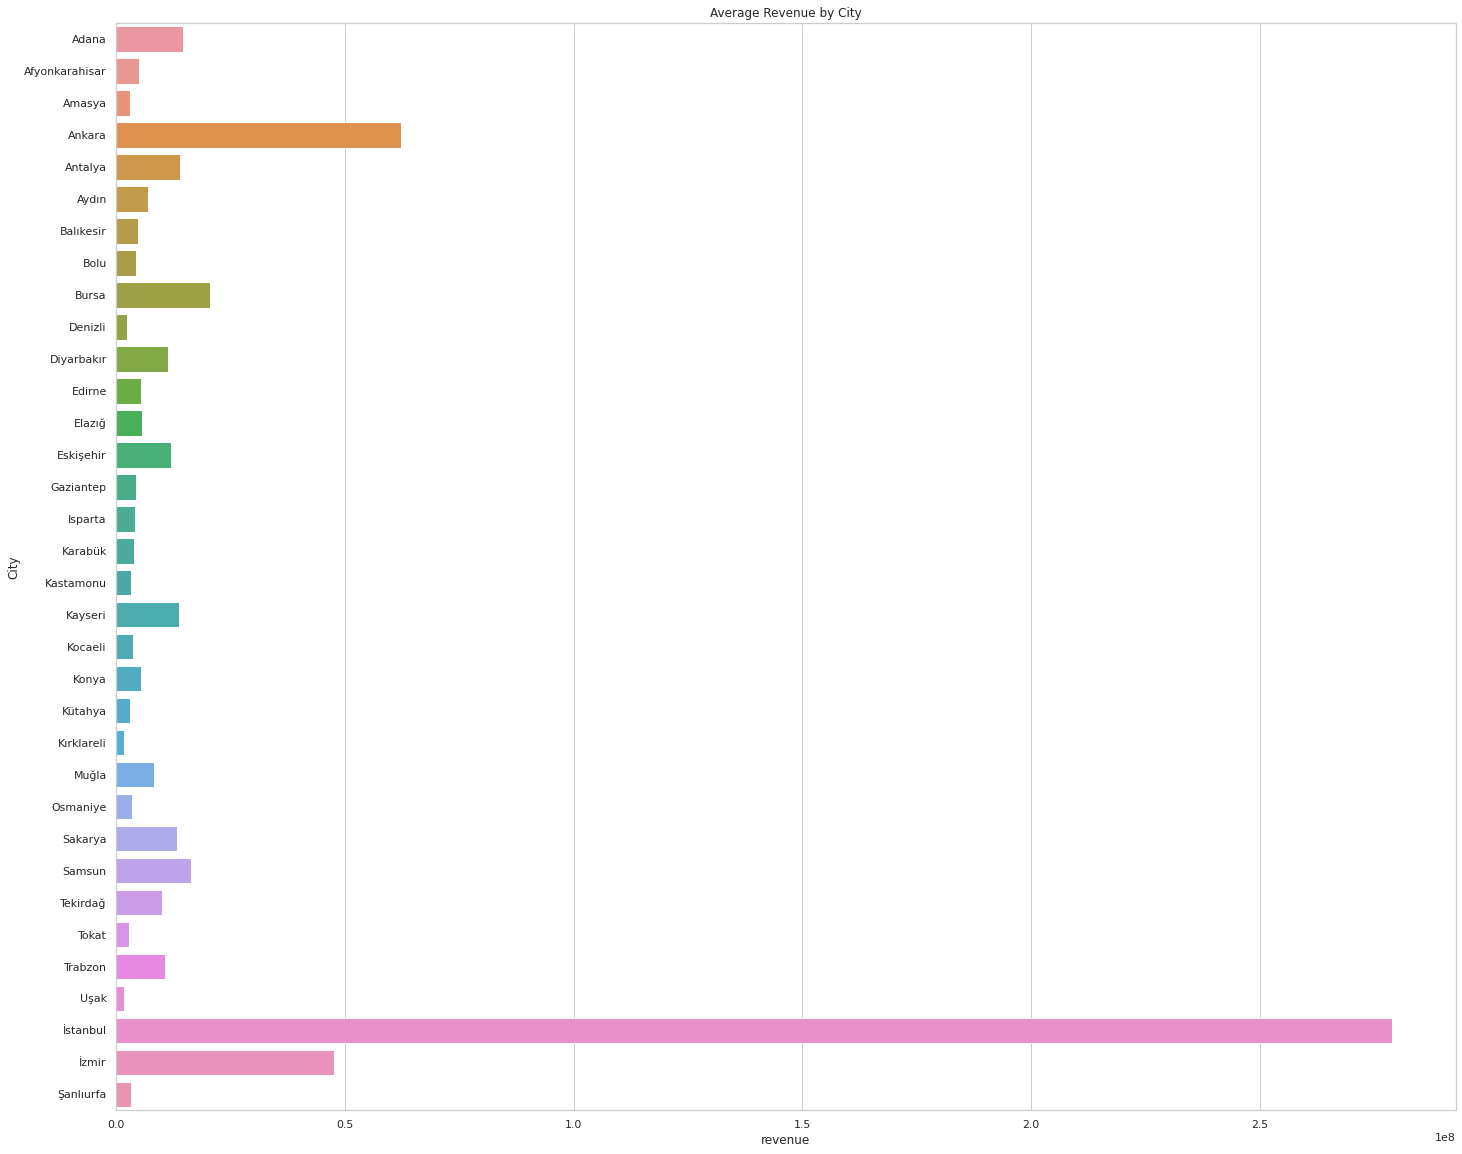

In [9]:
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
plt.figure(figsize=(24, 20))
plt.title('Average Revenue by City', loc = 'center')
ax = sns.barplot(y="City", x="revenue", data=df_grp2)
plt.show()

# The Data Set Feature/Attribute Information:

 1. id         : Restaurant id 
 2. Open Date  : Opening date for a restaurant (Date)
 3. City       : City that the restaurant is in. (Nominal)
 4. City Group : Type of the city. Big cities, or Other. (Ordinal)
 5. Type       : Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile (Nominal)
 6. P1 - P37   : Hidden data with three categories, Demographics, Real-estate, Commercial (Discrete)
 7. Revenue    : Revenue of the restaurant in a given year (Target Variable) (Continuous) 

In [10]:
# There are 137 and 43 rows in the restaurant training dataset
df_train.shape

(137, 42)

# Restaurant Categories Exploration

Observe a statistical description of the dataset, check the relevance of each feature, and select a few sample data points from the dataset which we can track throughout the project.

In [11]:
# Display a description of the dataset

display(df_train.iloc[:, 1:].describe())

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000


In [12]:
now= datetime.datetime.now()
df_train['Open Date']= pd.to_datetime(df_train['Open Date'], 
                    format= '%m/%d/%Y')
df_train['years_old']= now.year - pd.DatetimeIndex(
                              df_train['Open Date']).year
df_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,years_old
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,23
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,14
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,9
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,10
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,14
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,16
134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,16
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,12


In [13]:
# Segregate numerical features from the categorical 

categorical = df_train.iloc[:, 2:5]
num = df_train.iloc[:, 5:]
num
train_revenue
numerical = num.join(train_revenue)
numerical


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P30,P31,P32,P33,P34,P35,P36,P37,years_old,revenue
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,5,3,4,5,5,4,3,4,23,5653753.0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,0,14,6923131.0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,0,9,2055379.0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,25,12,10,6,18,12,12,6,10,2675511.0
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,5,1,3,2,3,4,3,3,13,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,3.0,5.0,4,2,4,4,4,4,...,0,0,0,0,0,0,0,0,14,5787594.0
133,4,5.0,4.0,4.0,2,3,5,4,4,5,...,0,0,0,0,0,0,0,0,16,9262754.0
134,3,4.0,4.0,4.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,0,16,2544857.0
135,4,5.0,4.0,5.0,2,2,5,5,5,5,...,0,0,0,0,0,0,0,0,12,7217634.0


# Scatterplot between each variable and restaurant

In [14]:
to_drop = ['P3', 'P7', 'P8', 'P9', 'P10', 'P12', 'P13', 'P14', 
           'P15', 'P16', 'P18', 'P26', 'P27', 'P29', 'P31', 'P34', 'P36']

numerical2 = numerical.drop(to_drop, axis=1)
numerical2

,P1,P2,P4,P5,P6,P11,P17,P19,P20,P21,...,P24,P25,P28,P30,P32,P33,P35,P37,years_old,revenue
0,4,5.0,4.0,2,2,3,2,5,4,1,...,1,1,2.0,5,4,5,4,4,23,5653753.0
1,4,5.0,4.0,1,2,1,0,3,2,1,...,0,0,3.0,0,0,0,0,0,14,6923131.0
2,2,4.0,5.0,2,3,2,0,1,1,1,...,0,0,1.0,0,0,0,0,0,9,2055379.0
3,6,4.5,6.0,4,4,8,3,20,12,6,...,2,2,2.5,25,10,6,12,6,10,2675511.0
4,3,4.0,4.0,2,2,2,1,2,2,1,...,2,3,1.0,5,3,2,4,3,13,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,5.0,4,2,4,0,4,3,2,...,0,0,2.0,0,0,0,0,0,14,5787594.0
133,4,5.0,4.0,2,3,5,0,3,2,2,...,0,0,3.0,0,0,0,0,0,16,9262754.0
134,3,4.0,4.0,2,3,1,0,2,3,1,...,0,0,2.0,0,0,0,0,0,16,2544857.0
135,4,5.0,5.0,2,2,2,0,1,1,1,...,0,0,3.0,0,0,0,0,0,12,7217634.0


<AxesSubplot:>

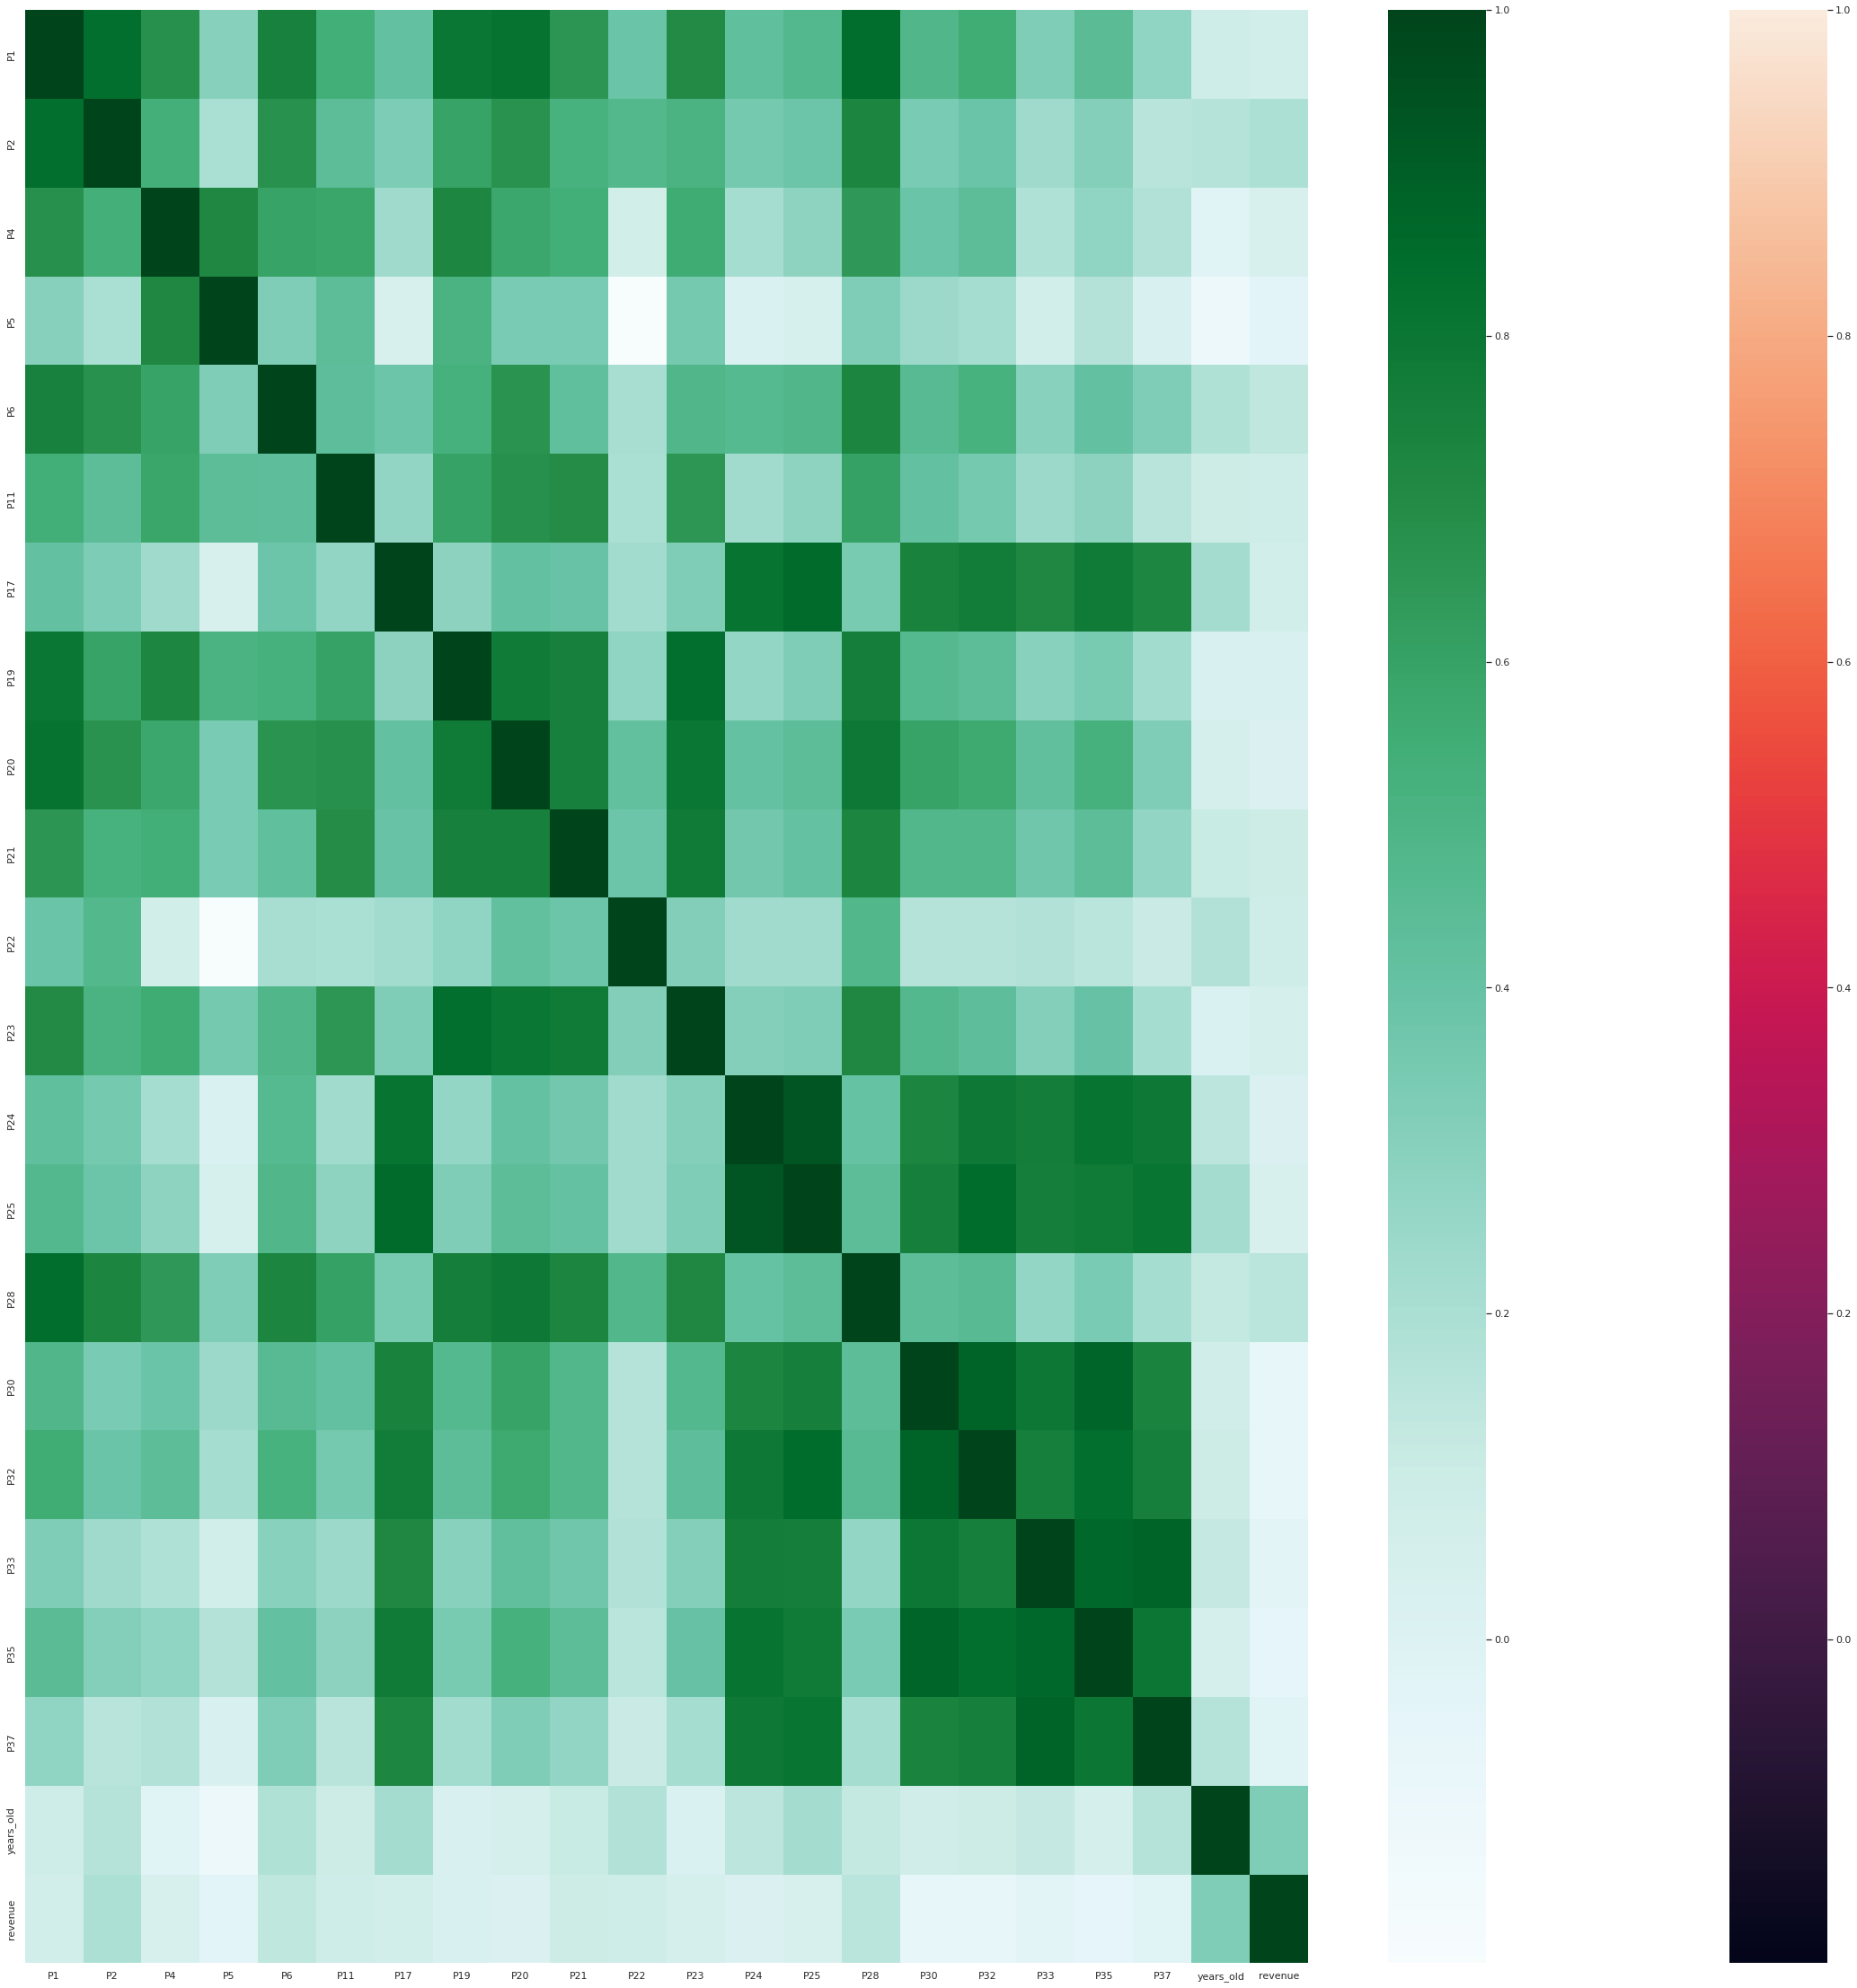

In [15]:
plt.figure(figsize=(40,40)) 
# play with the figsize until the plot is big enough to plot all the columns
# of your dataset, or the way you desire it to look like otherwise

sns.heatmap(numerical2.corr())
sns.heatmap(numerical2.corr(), cmap='BuGn')

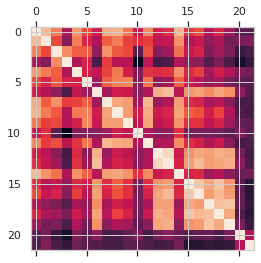

In [16]:
plt.matshow(numerical2.corr())
plt.show()


In [17]:
spm = pd.tools.plotting.scatter_matrix(numerical2, alpha=0.2, figsize=(120, 120), diagonal='hist')
plt.show()

AttributeError: module 'pandas' has no attribute 'tools'

In [ ]:
for col in numerical.columns[0:len(numerical.columns)]:
    sns.boxplot(y='revenue', x=col, 
                palette=['b','r'], data=numerical)
    sns.despine(offset=10, trim=True)

    plt.show()

In [ ]:
numerical2.corr()

In [ ]:
log_transf = np.log(numerical2[['years_old','revenue']])
root_transf = np.sqrt(numerical2.drop(['years_old','revenue'], axis=1))

In [ ]:
log_transf

In [ ]:
root_transf

In [ ]:
root_col = root_transf.columns
scaler= StandardScaler()
y= scaler.fit_transform(root_transf)
y=pd.DataFrame(y, columns = root_col)
num_data = pd.concat([y, log_transf], axis=1)

In [ ]:
categorical['City Group'] = pp.LabelBinarizer().fit_transform(categorical['City Group']) 
categorical3 = pd.concat([categorical, pd.get_dummies(categorical.Type) ], axis = 1)
categorical3.drop(['City', 'Type'], axis=1, inplace=True)

In [ ]:
categorical

num_cat = categorical3.join(numerical2)
num_cat_training = num_cat.drop('revenue', axis =1)
y = num_cat.revenue

In [ ]:
num_cat_training

In [ ]:
y

# Dimensionality Reduction using Principal Component Analysis

Intially, in the dataset there are 43 features and after performing the Exploratory Data Analysis (EDA) and feature selection we have reduced it to 25 features. The transformed dataset contents 25 features.  

In [ ]:
num_cat_training.shape

In [ ]:
pca = PCA(0.98)
pca.fit(num_cat_training)
num_cat_training = pca.transform(num_cat_training)
pca.n_components_

In [ ]:
num_cat_training

After performing the PCA with a variance of 98% we are left with 13 features

# Model Building

In [ ]:
n = pca.n_components_
gbrReg = GradientBoostingRegressor(max_depth=3, n_estimators=n,  
          criterion='mse', random_state=42) 
gbrReg.fit(num_cat_training, y)
y_pred = gbrReg.predict(num_cat_training)
mserror = mean_squared_error(y, y_pred)
rmse = np.sqrt(mserror)
rmse
y_pred.astype(int)

# Final RMSE value for train set 

In [ ]:
rmse

# Predictions


In [ ]:
# Read the analytics csv file and store our dataset into a dataframe called "df"
df_test = pd.read_csv("Restaurant_Test.csv")
df_test1 = df_test

In [ ]:
# Check to see if there are any missing values in our data set
df_test.isnull().any()

In [ ]:
# Get a quick overview of what we are dealing with in our dataset
df_test.head()

In [ ]:
# Columns in the test data
df_test.columns

In [ ]:
# There are 100000 and 42 rows in the restaurant testing dataset
df_test.shape

In [ ]:
now= datetime.datetime.now()
df_test['Open Date']= pd.to_datetime(df_test['Open Date'], 
                    format= '%m/%d/%Y')
df_test['years_old']= now.year - pd.DatetimeIndex(
                              df_test['Open Date']).year
df_test

In [ ]:
# Segregate numerical features from the categorical 

categorical_test = df_test.iloc[:, 2:5]
numerical_test = df_test.iloc[:, 5:]
numerical_test


In [ ]:
numerical_test2 = numerical_test.drop(to_drop, axis=1)
numerical_test2

In [ ]:
log_transf_test = np.log(numerical_test2[['years_old']])
root_transf_test = np.sqrt(numerical_test2.drop(['years_old'], axis=1))

In [ ]:
root_col_test = root_transf_test.columns
scaler= StandardScaler()
y_test= scaler.fit_transform(root_transf_test)
y_test =pd.DataFrame(y_test, columns = root_col_test)
num_data_test = pd.concat([y_test, log_transf_test], axis=1)

In [ ]:
categorical_test['City Group'] = pp.LabelBinarizer().fit_transform(categorical_test['City Group']) 
categorical3_test = pd.concat([categorical_test, pd.get_dummies(categorical_test.Type)], axis = 1)
categorical3_test.drop(['City', 'Type'], axis=1, inplace=True)

In [ ]:
num_cat_testing = categorical3_test.join(numerical_test2)
num_cat_testing = num_cat_testing.drop('MB', axis =1)

num_cat_testing

In [ ]:
num_cat_testing = pca.transform(num_cat_testing)

len(num_cat_testing)
pca.n_components_

In [ ]:
import math 



In [ ]:
y_hat_gbr = gbrReg.predict(num_cat_testing)
y_hat_gbr1 = y_hat_gbr.astype(int)
y_hat_gbr1

In [ ]:
test = [np.exp(i) for i in y_hat_gbr1]
test

In [ ]:
y_val = np.exp(y_hat_gbr1)
y_val

In [ ]:
y_pred_test = gbrReg.predict(num_cat_testing)
print(y_pred_test)
y_pred_test2 = y_pred_test.astype(int)
print(y_pred_test2)
y_pred_test2 = pd.DataFrame(y_pred_test2)
y_pred_test2.index.names = ['Id']
y_pred_test2.columns = ['Predictions']
pd.DataFrame(y_pred_test2).to_csv('Results_Kaggle')
